In [3]:
#imports
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re
import random
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
from textblob import TextBlob
from langdetect import detect_langs
import pickle
from datetime import datetime

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
import multiprocessing
import gensim
from gensim.utils import simple_preprocess

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from langdetect import detect
# from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import svm
import plotly.graph_objects as go
# from better_profanity import profanity
import string

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB


In [4]:
from sklearn.linear_model import RidgeClassifier


In [5]:
veclyrics = np.load('veclyrics.pkl',allow_pickle = True)
df = pd.read_pickle("response.pkl")


In [6]:
X_train, X_test, y_train, y_test = train_test_split(veclyrics, df['pop'], test_size = 0.2, random_state = 1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import Ridge #import ridge 



# Multinomial Naive Bayes

In [7]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test) # make predictions for X_test

In [8]:
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred)) # accuracy of predictions

#metrics.accuracy_score(y_test, y_pred) same output as above

Multinomial Naive Bayes Accuracy: 0.617739096420888


In [9]:
#dir(MultinomialNB())

In [10]:
nb.predict_proba(X_test) # checking the probability of accurate predictions

array([[0.59315926, 0.40684074],
       [0.53024762, 0.46975238],
       [0.59985787, 0.40014213],
       ...,
       [0.58576483, 0.41423517],
       [0.62871555, 0.37128445],
       [0.6364539 , 0.3635461 ]])

In [11]:
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(5617 / (5617 + 4609)))

0    5617
1    4609
Name: pop, dtype: int64
Null accuracy: 0    0.549286
Name: pop, dtype: float64
Manual null accuracy: 0.5492861333854879


In [12]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)

# Numpy Array with 2C
# left Column: probability class 0
# right C: probability class 1
# we only need the right column 
y_pred_prob = nb.predict_proba(X_test)[:, 1]
y_pred_prob

# Naive Bayes predicts very extreme probabilites, you should not take them at face value

array([0.40684074, 0.46975238, 0.40014213, ..., 0.41423517, 0.37128445,
       0.3635461 ])

In [13]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)


0.68786596248958

* AUC is useful as a single number summary of classifier performance

* Higher value = better classifier

* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation

* AUC is useful even when there is high class imbalance (unlike classification accuracy)

# Bernoulli Naive Bayes 

In [14]:
gnb = BernoulliNB()
gnb.fit(X_train,y_train)
gnb_y_pred = gnb.predict(X_test)
accuracyBNB = gnb.score(X_test,y_test)


In [15]:
print("Accuracy for bernoulli naive bayes:", accuracyBNB)


Accuracy for bernoulli naive bayes: 0.6408175239585371


In [16]:
# print the confusion matrix
metrics.confusion_matrix(y_test, gnb_y_pred)

array([[4008, 1609],
       [2064, 2545]])

# Ridge Classifier

In [ ]:

#import data
X_train = pd.read_pickle('veclyrics_doc2vec_train.pkl')
X_test = pd.read_pickle('veclyrics_doc2vec_test.pkl')
y_train_all = pd.read_pickle('response_doc2vec_train.pkl')
y_test_all = pd.read_pickle('response_doc2vec_test.pkl')
y_train_all = y_train_all.iloc[:,3:10]
y_test_all = y_test_all.iloc[:,3:10]
y_train_one = y_train_all.iloc[:,0]
y_test_one = y_test_all.iloc[:,0]

In [51]:
clf = RidgeClassifier().fit(X_train, y_train_one)
clf.score(X_train, y_train_one)


0.796762677881559

In [52]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = X_train, y_train_one
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796363 using {'alpha': 0.1}
0.796363 (0.003421) with: {'alpha': 0.1}
0.796363 (0.003421) with: {'alpha': 0.2}
0.796363 (0.003421) with: {'alpha': 0.3}
0.796363 (0.003421) with: {'alpha': 0.4}
0.796363 (0.003421) with: {'alpha': 0.5}
0.796363 (0.003421) with: {'alpha': 0.6}
0.796363 (0.003421) with: {'alpha': 0.7}
0.796363 (0.003421) with: {'alpha': 0.8}
0.796363 (0.003421) with: {'alpha': 0.9}
0.796363 (0.003421) with: {'alpha': 1.0}


In [18]:
# Randomized Search for Algorithm Tuning
# need help with this part

'''

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the diabetes datasets
dataset = df
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(df., dataset.target)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

'''

"\n# Randomized Search for Algorithm Tuning\nimport numpy as np\nfrom scipy.stats import uniform as sp_rand\nfrom sklearn import datasets\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# load the diabetes datasets\ndataset = df\n# prepare a uniform distribution to sample for the alpha parameter\nparam_grid = {'alpha': sp_rand()}\n# create and fit a ridge regression model, testing random alpha values\nmodel = Ridge()\nrsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)\nrsearch.fit(df., dataset.target)\nprint(rsearch)\n# summarize the results of the random parameter search\nprint(rsearch.best_score_)\nprint(rsearch.best_estimator_.alpha)\n\n"

# A Note on Multi-Label classification

Basically, there are three methods to solve a multi-label classification problem:

1) Problem Transformation
2) Adapted Algorithm
3) Ensemble approaches

Problem Transformation: transforms our multi-label problem into single-label problem(s). This method can be carried out in three different ways as:
        - Binary Relevance
        - Classifier Chains
        - Label Powerset
   
Adapted Algorithm: adapts the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.
        - e.g. kNN's multi-label adaptation is MLkNN. 
    
Ensemble Approaches: Ensemble apparently always produces better results. 
        - Scikit-Multilearn library provides different ensembling classification functions. 



# K Nearest Neighbors


#### this needs to be run using the doc2vec input

 * reference: 
 https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
 https://www.python-course.eu/k_nearest_neighbor_classifier.php

KNN neighbors is a package of the sklearn, which provides functionalities for nearest neighbor classifiers both for unsupervised and supervised learning.

Non parametric

The classes in sklearn.neighbors can handle both Numpy arrays and scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

scikit-learn implements two different nearest neighbors classifiers:

### KNeighborsClassifier
is based on the k nearest neighbors of a sample, which has to be classified. The number 'k' is an integer value specified by the user. This is the most frequently used classifiers of both algorithms.

### RadiusNeighborsClassifier
is based on the number of neighbors within a fixed radius r for each sample which has to be classified. 'r' is float value specified by the user. This classifier is less often used.
There is no general way to define an optimal value for 'k'. This value depends on the data. As a general rule we can say that increasing 'k' reduces the noise but on the other hand makes the boundaries less distinct.

The decision based on the nearest neighbors can be reached either uniform weights, the class assigned to a query sample is calculated by a simple majority vote of the k-nearest neighbors. This does not take into account that the neighbors closer to the sample should contribute more than the ones further away. The weighting can be controlled by the weights keyword:

weights = 'uniform' assigns uniform weights to each neighbor. This is also the default value.

weights = 'distance' assigns weights proportional to the inverse of the distance from the query sample.

It is also possible to supply a user-defined function to compute the distance.


## Scaling the data

### dont need to scale if  we vectorize??? although, the model did run a lot faster after scaling. 

 - MinMaxScaler: One of the major reason is that your features such as price can't have negative values and as you mentioned, it could be sparse. From Documentation: The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

 - if your numerical variable has a huge variance, then go for RobustScaler or StandardScaler.

 - You dont have to scale the one hot encoded features.

 - For BoW, it is important to preserve the sparsity of the data. If you apply the StandardScaler, you will lose the sparsity. You definitely have to go for MinMaxScaler. Another option would be to go for TfidfVectorizer, which does the l2 normalization by default.

In [15]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\n\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = classifier.predict(X_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3118 2499]
 [2108 2501]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      5617
           1       0.50      0.54      0.52      4609

    accuracy                           0.55     10226
   macro avg       0.55      0.55      0.55     10226
weighted avg       0.55      0.55      0.55     10226



#### Comparing Error Rate with the K Value

* There is no way to know beforehand which value of K that yields the best results in the first go. So randomly choose 5 as the K value.

* One way to find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

* Below, is a plot of the mean error for the predicted values of test set for all the K values between 1 and 40.

* To do this, we had to first calculate the mean of error for all the predicted values where K ranges from 1 and 40. 

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. 

Text(0, 0.5, 'Mean Error')

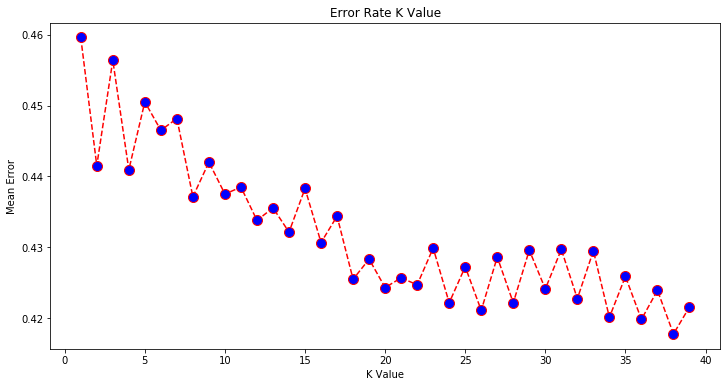

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



#### this needs to be run using the doc2vec iinput


In [19]:
from sklearn.model_selection import cross_val_score # takes 40 min


In [20]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 49


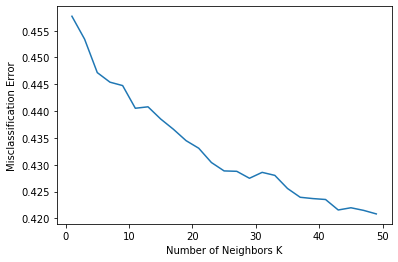

In [21]:
# using cross validation to find the optimal k


# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [28]:
cv_scores2 = []


knn = KNeighborsClassifier(n_neighbors=100)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
cv_scores2.append(scores.mean())

In [30]:
# using cross validation to find the optimal k


# changing to misclassification error
mse = [1 - x for x in cv_scores2]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))


The optimal number of neighbors is 50


In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3554 2063]
 [2213 2396]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      5617
           1       0.54      0.52      0.53      4609

    accuracy                           0.58     10226
   macro avg       0.58      0.58      0.58     10226
weighted avg       0.58      0.58      0.58     10226



In [35]:
#proportion of 1s in each POP column
y_test.sum()/len(y_test)

0.450713866614512

In [36]:
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(5617 / (5617 + 4609)))

0    5617
1    4609
Name: pop, dtype: int64
Null accuracy: 0    0.549286
Name: pop, dtype: float64
Manual null accuracy: 0.5492861333854879


# YAY +9% HIGHER!... or not? idk. i give up


In [ ]:
df_train.to_pickle("response_doc2vec_train.pkl")

## Parameter Tuning

#### this needs to be run using the doc2vec input



### KNN Parameters

 - n_neighbors 
   int, optional (default = 5)) 
   Number of neighbors to use by default for meth:'kneighbors' queries.
 
 - weights
   str or callable, optional (default = 'uniform')
   weight function used in prediction. Possible values:
       - 'uniform' : uniform weights. All points in each neighborhood are weighted equally.
       - 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point           will have a greater influence than neighbors which are further away.
       - [callable] : a user-defined function which accepts an array of distances, and returns an array of the same             shape containing the weights.

 - algorithm
    optional Algorithm used to compute the nearest neighbors:
    'ball_tree' will use :class:'BallTree'
    'kd_tree' will use :class:'KDTree'
    'brute' will use a brute-force search.
    'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:'fit' method.
     Note: fitting on sparse input will override the setting of this parameter, using brute force.
 
 - leaf_size
    int, optional (default = 30)
    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the       memory required to store the tree. The optimal value depends on the nature of the problem.

 - p
    integer, optional (default = 2)
    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and       euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

 - metric
    string or callable, default 'minkowski'
    the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the           standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

 - metric_params
   dict, optional (default = None)
   Additional keyword arguments for the metric function.

 - n_jobs
   int, optional (default = 1)
   The number of parallel jobs to run for neighbors search. If '-1', then the number of jobs is set to the number of    CPU cores. Doesn't affect :meth:'fit' method.


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import nltk
import sklearn
import nltk.collocations 
from nltk import FreqDist, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import string, re
import urllib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lolajohnston/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/lolajohnston/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# KNN using the new Doc2vec file

In [37]:

#import data
X_train = pd.read_pickle('veclyrics_doc2vec_train.pkl')
X_test = pd.read_pickle('veclyrics_doc2vec_test.pkl')
y_train_all = pd.read_pickle('response_doc2vec_train.pkl')
y_test_all = pd.read_pickle('response_doc2vec_test.pkl')
y_train_all = y_train_all.iloc[:,3:10]
y_test_all = y_test_all.iloc[:,3:10]
y_train_one = y_train_all.iloc[:,0]
y_test_one = y_test_all.iloc[:,0]

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=50, weights='distance', leaf_size=5000)
classifier.fit(X_train, y_train_all)

# Parameters changed:
# k = 50 (based on elbow method results)
# weights = distance (just to try it)
# leaf_size = 5000 (to make the model run faster)

KNeighborsClassifier(algorithm='auto', leaf_size=5000, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

In [58]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_all, y_pred))
print(classification_report(y_test_all, y_pred))
# score for k = 50

ValueError: multilabel-indicator is not supported

# Evaluating the KNN


    * For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_one, y_pred))
print(classification_report(y_test_one, y_pred))
# score for k = 5

[[ 228 2231]
 [ 365 7401]]
              precision    recall  f1-score   support

           0       0.38      0.09      0.15      2459
           1       0.77      0.95      0.85      7766

    accuracy                           0.75     10225
   macro avg       0.58      0.52      0.50     10225
weighted avg       0.68      0.75      0.68     10225



# Adapted Algorithm- MLkNN

In [27]:
#proportion of 1s in each genre column
y_test_all.sum()/len(y_test_all)

rock                 0.759511
singer-songwriter    0.178289
pop                  0.446455
metal                0.149438
folk                 0.207335
country              0.183081
hip hop / rap        0.072665
dtype: float64

In [78]:
dir(MLkNN)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compute_cond',
 '_compute_prior',
 '_ensure_input_format',
 '_ensure_output_format',
 '_estimator_type',
 '_generate_data_subset',
 '_get_param_names',
 '_get_tags',
 'fit',
 'get_params',
 'predict',
 'predict_proba',
 'score',
 'set_params']

In [82]:
X_train

array([[-5.16140110e-02,  1.22745532e+00, -4.99098136e-01, ...,
        -3.34593496e-01, -5.85505862e-01,  1.10480986e+00],
       [ 2.14204743e-01, -5.16698510e-01, -1.10380629e-01, ...,
         2.09527687e-01, -5.08412696e-01,  9.74778724e-01],
       [ 1.00244668e+00, -9.77705687e-01,  2.74100238e+00, ...,
        -7.11687052e-01, -1.91193995e+00,  1.66378078e-01],
       ...,
       [-8.77118256e-01, -3.57925452e-01, -7.81957479e-01, ...,
        -9.30199795e-01, -2.49677523e-03, -1.00270559e+00],
       [-5.71172128e-01, -3.34843032e+00, -3.76007775e-01, ...,
        -9.44646503e-01, -1.58669810e+00, -2.37546630e-01],
       [-4.74405313e-01,  6.03534255e+00,  4.40405435e-01, ...,
        -1.09800733e+00, -7.48991219e-01,  1.51581664e-03]])

In [87]:
y_train_all_mlknn = y_train_all.rename_axis('ID').values #turning df into numpy array

print(y_train_all_mlknn)

[[1 1 0 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 1 0 0]]


In [84]:
# have to give MLkNN a numpy array so 

In [95]:
from skmultilearn.adapt import MLkNN


classifier = MLkNN(k=50, ignore_first_neighbours=0)

# train
classifier.fit(X_train, y_train_all_mlknn)




from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(45,55), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(X, y)

print (clf.best_params_, clf.best_score_)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning:

From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.



AttributeError: 'Series' object has no attribute 'getformat'

In [94]:
print (clf.best_params_, clf.best_score_)


AttributeError: 'RidgeClassifier' object has no attribute 'best_params_'

In [90]:
# predict
predictions_MLkNN = classifier.predict(X_test)

In [92]:
accuracy_score(y_test_all,predictions_MLkNN) #0.191687 same as binary relevancea


0.1916870415647922

# Binary Relevance - KNN 

https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

In [72]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(MLkNN(k=50))

# train
classifier.fit(X_train, y_train_all)

# predict
predictions = classifier.predict(X_test)



In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_all,predictions) #0.19168

0.1916870415647922

# Classifier Chains - KNN
# ## this isn't working


In [75]:
from skmultilearn.problem_transform import ClassifierChain


In [77]:


# using classifier chains


# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(MLkNN(k=50))

# train
classifier.fit(X_train, y_train_all)

# predict
predictions_cc = classifier.predict(X_test)

accuracy_score(y_test_all,predictions_cc)

TypeError: 'coo_matrix' object is not subscriptable

# Binary Relevance - Naive Bayes

In [67]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train_all)

# predict
predictions = classifier.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_all,predictions) # 0.16909

0.16909535452322738

# Appendix

# notes for me



#### The below applies to multi-classification problems which is NOT the same as multi-label.

#### OneVsRest - problem transformation method

#### treats the problem like multiple sets of binary classification problems

* Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).

* In an “one-to-rest” strategy, one could build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.

* The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.

* For instance, it is more like asking simple questions, say, “is the comment toxic or not”, “is the comment threatening or not?”, etc. Also there might be an extensive case of overfitting here, since most of the comments are unlabeled, i,e., most of the comments are clean comments.

In [29]:
# one vs rest 

# Using pipeline for applying logistic regression and one vs rest classifier
#LogReg_pipeline = Pipeline([
                #('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])


# more notes for me
Choosing ML algoriths
We chose machine learning multicategory classification algorithms from the following seven algorithmic families: support vector machines, ridge classification, regularized logistic regression, Bayesian logistic regression, random forests, k-nearest neighbors. 


Since all the classification tasks were multicategory (that is, with three or more classes) and most of the employed classifiers (except for random forests, k-nearest neighbors) are designed for binary classification problems (that is, with two classes), we can adopt a one-versus-rest approach for the latter methods.

We can train separate binary classifiers for each class against the rest and then classify new samples by taking a vote of the binary classifiers and choosing the class with the ‘strongest’ vote. The one-versus-rest approach for classification is known to be among the best performing methods for multicategory classification for other types of data.

Random forests, k-nearest neighbors can solve multicategory problems natively and can be applied directly.